In [8]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# 自动生成所有 40 个 PDB 文件的路径
pdb_files = [
    f"1v1d_af2/1v1d_af2_40predictions_5c7bb_unrelaxed_rank_{i:03d}_alphafold2_ptm_model_{model}_seed_{seed:03d}.pdb"
    for i, model, seed in zip(range(1, 41),
                              [4, 4, 3, 3, 4, 4, 4, 4, 4, 3,
                               2, 4, 3, 1, 1, 3, 2, 1, 1, 3,
                               3, 3, 2, 1, 1, 2, 2, 5, 1, 2,
                               5, 1, 5, 5, 5, 5, 5, 2, 2, 5],
                              [5, 3, 5, 3, 1, 2, 6, 4, 0, 2,
                               0, 7, 6, 2, 0, 1, 6, 3, 4, 4,
                               7, 0, 3, 1, 7, 4, 7, 6, 5, 1,
                               0, 6, 5, 3, 4, 7, 2, 5, 2, 1])
]

In [19]:
# 将所有 PDB 文件加载为一个多帧的 Trajectory
trajectories = [md.load(pdb) for pdb in pdb_files]
trajectory = md.join(trajectories)  # 合并为一个包含多个帧的轨迹

# 选择第一个 PDB 作为参考结构
reference = trajectory[0]

# 对齐所有帧到参考结构
trajectory.superpose(reference)

# 选择 Cα 原子
ca_indices = trajectory.topology.select("name CA")

# 计算 RMSF (Cα 原子)
rmsf_values = md.rmsf(trajectory, trajectory, atom_indices=ca_indices)

# 获取残基编号
topology = trajectory.topology
residue_ids = [res.index for res in topology.residues if res.is_protein]

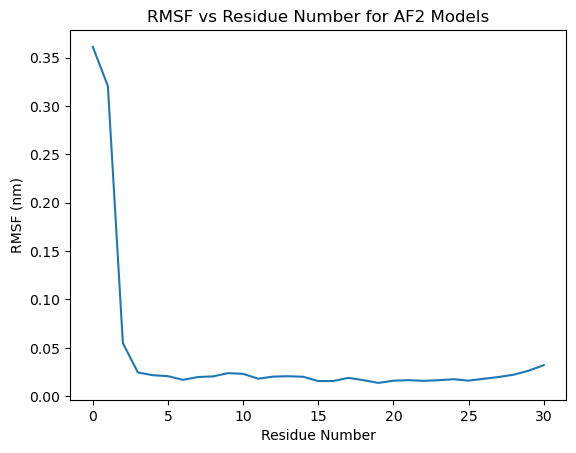

In [20]:
# 绘制 RMSF 与残基编号的关系图
plt.plot(residue_ids, rmsf_values)
plt.xlabel('Residue Number')
plt.ylabel('RMSF (nm)')
plt.title('RMSF vs Residue Number for AF2 Models')
plt.show()